<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-SNE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import math
import random as rd
import warnings
warnings.filterwarnings("ignore")
# from sklearn.manifold import

In [ ]:
! gdown --id 1BHByvjaeWcOMQ43G9aG320Jgm5bUf_-l

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BHByvjaeWcOMQ43G9aG320Jgm5bUf_-l
To: /content/MNIST.zip
100% 16.0M/16.0M [00:00<00:00, 97.8MB/s]


In [ ]:
!unzip MNIST.zip

Archive:  MNIST.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
# Read the data using pandas
df = pd.read_csv("mnist_train.csv")
# print the first 5 rows
df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
# save the labels
y = df["label"]
X = df.drop("label", axis=1)

In [ ]:
X = X.to_numpy()

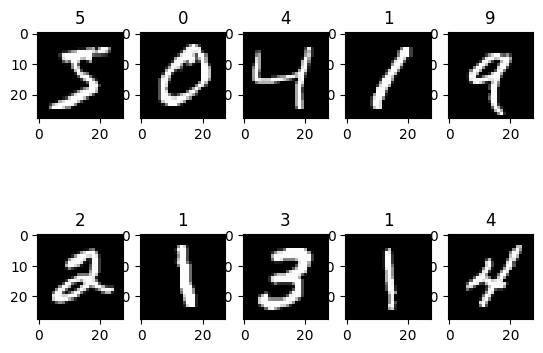

In [ ]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  image_sample = X[i,:].reshape(28, 28)
  plt.imshow(image_sample, cmap="gray")
  plt.title(y[i])

In [ ]:
# Data preprocessing
standardized_X = StandardScaler().fit_transform(X)

In [ ]:
X_10000 = standardized_X[:10000, :]
labels_10000 = y[:10000]

In [ ]:
X_10000.shape

(10000, 784)

In [ ]:
pca_mnist2 = PCA(n_components=2) # we need 2 principal components
PC_mnist2 = pca_mnist2.fit_transform(X_10000)
PC_mnist2.shape

(10000, 2)

In [ ]:
PC_mnist2

array([[-9.23276548e-01, -4.64175213e+00],
       [ 9.23380607e+00, -6.19407922e+00],
       [ 2.49675909e+00,  1.15371789e+01],
       ...,
       [-5.10927848e+00, -6.50954647e+00],
       [-5.52816005e+00,  3.70347397e+00],
       [-5.58272843e+00, -9.12975438e-03]])

In [ ]:
# TSNE
# Pick the top 10000 points as TSNE
tsne_minst2 = TSNE(n_components=2)
# Configure the parameters
# number of componnts = 2
# default perplexity = 30
# default learning rate = 200
# Max iterations for optimization = 1000
tsne_data = tsne_minst2.fit_transform(X_10000);
# create a new dataframe to help plot the result
tsne_data = np.vstack((tsne_data.T, labels_10000)).T

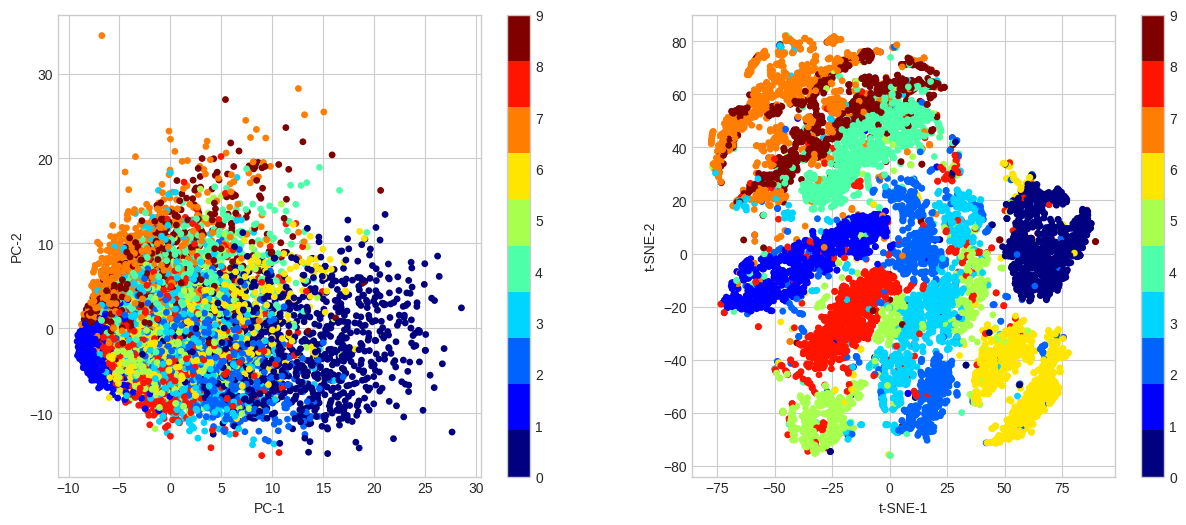

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,6))
c_map = plt.cm.get_cmap("jet", 10)

plt.subplot(1, 2, 1)
plt.scatter(PC_mnist2[:,0], PC_mnist2[:,1], s=15, cmap=c_map, c=labels_10000)
plt.colorbar()
plt.xlabel("PC-1"), plt.ylabel("PC-2")

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=15, cmap=c_map, c=labels_10000)
plt.colorbar()
plt.xlabel("t-SNE-1"), plt.ylabel("t-SNE-2")

plt.show()

# DBSCAN

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

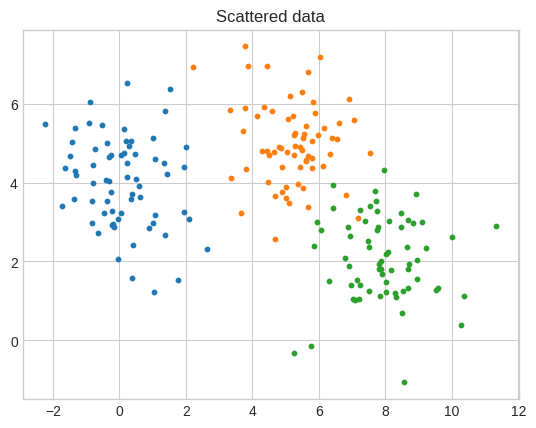

In [ ]:
centers = [(0,4), (5,5), (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
plt.scatter(X[y==0, 0], X[y==0, 1], s=10, label="Cluster1")
plt.scatter(X[y==1, 0], X[y==1, 1], s=10, label="Cluster2")
plt.scatter(X[y==2, 0], X[y==2, 1], s=10, label="Cluster3")
plt.title("Scattered data")
plt.show()

In [ ]:
def check_core_point(eps, minPts, df, index):
  # get points from given index
  x, y = df.iloc[index]["X"], df.iloc[index]["Y"]

  # check available points within radius
  temp = df[((np.abs(x - df["X"]) <= eps) & (np.abs(y - df["Y"]) <= eps)) & (df.index != index)]

  # check how many points are present within radius
  if len(temp) >=minPts:
    # return format (dataframe, is_core, is_border, is_noise)
    return (temp.index, True, False, False)

  elif (len(temp) < minPts) and len(temp) > 0:
    # return format (dataframe, is_core, is_border, is_noise)
    return (temp.index, False, True, False)

  elif len(temp) == 0:
    # return format (dataframe, is_core, is_border, is_noise)
    return (temp.index, False, False, True)

In [ ]:
def cluster_with_stack(eps, minPts, df):

    #initiating cluster number
    C = 1
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []


    while (len(unvisited) != 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True

        #choose a random unvisited point
        current_stack.add(random.choice(unvisited))

        while len(current_stack) != 0: #run until a cluster is complete

            #pop current point from stack
            curr_idx = current_stack.pop()

            #check if point is core, neighbour or border
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)

            #dealing with an edge case
            if (isborder & first_point):
                #for first border point, we label it aand its neighbours as noise
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))

                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]

                continue

            unvisited.remove(curr_idx) #remove point from unvisited list


            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points

            if iscore: #if current point is a core
                first_point = False

                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))

                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))

                continue

        if not first_point:
            #increment cluster number
            C+=1

    return clusters


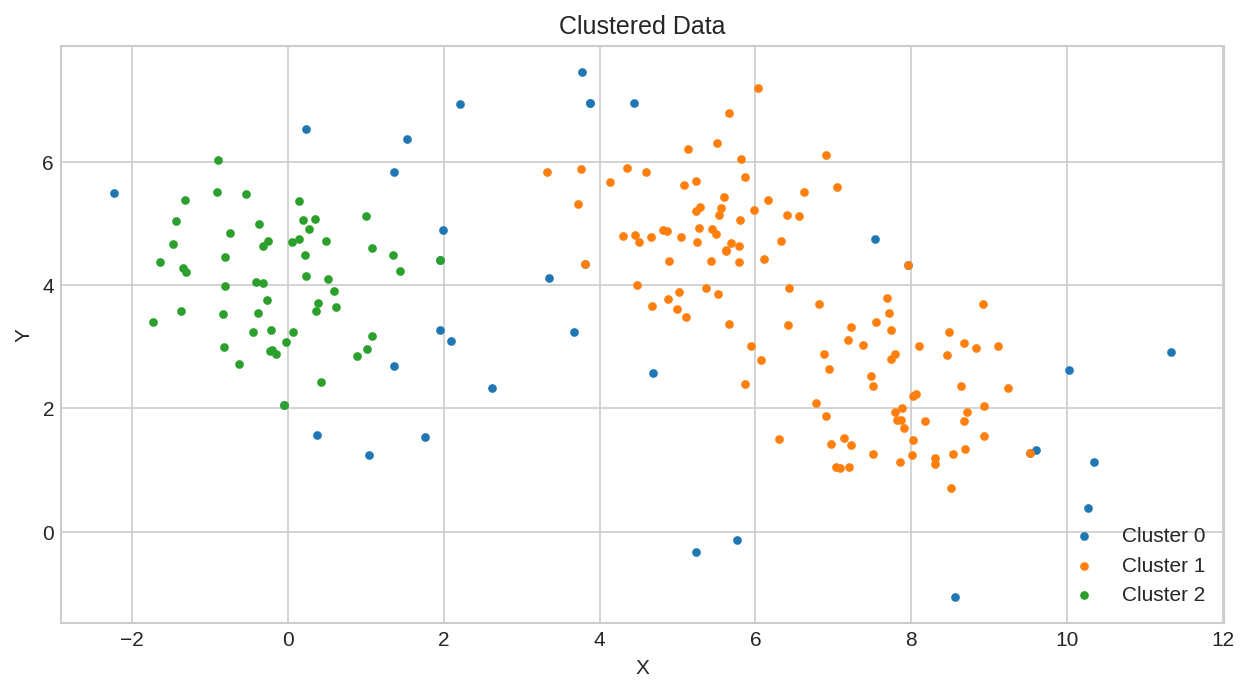

In [ ]:
# radius of circle defined as 0.6
eps = 0.6
# minimum neighboring points set to 3
minPts = 3

data = pd.DataFrame(X, columns=["X","Y"])
clustered = cluster_with_stack(eps, minPts, data)

idx, cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns=["idx", "cluster"])

plt.figure(figsize=(10,5), dpi=150)
for clust in np.unique(cluster):
  plt.scatter(
      X[cluster_df["idx"][cluster_df["cluster"]==clust].values, 0],
      X[cluster_df["idx"][cluster_df["cluster"]==clust].values, 1],
      s=10,
      label=f"Cluster{clust}"
      )

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title("Clustered Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

# Agglomerative Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [ ]:
!gdown --id 14FfwQXXHjBBeSYOxzI-qTceKTFtUDz_4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14FfwQXXHjBBeSYOxzI-qTceKTFtUDz_4
To: /content/Mall_Customers_dataset.csv
100% 4.29k/4.29k [00:00<00:00, 13.0MB/s]


In [ ]:
dataset = pd.read_csv("Mall_Customers_dataset.csv")

In [ ]:
dataset.shape

(200, 5)

In [ ]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


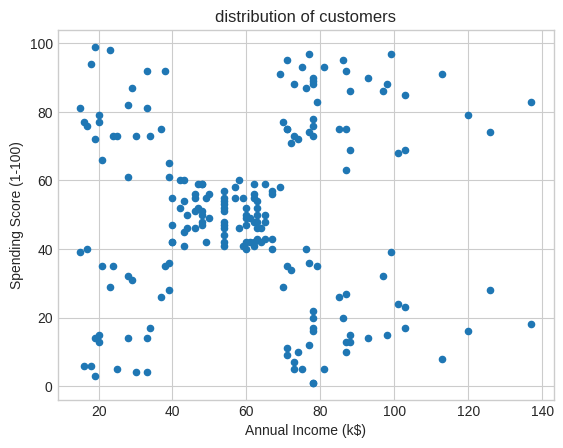

In [ ]:
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"], s=20)

plt.title("distribution of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [ ]:
X = dataset.iloc[:, [3, 4]].values

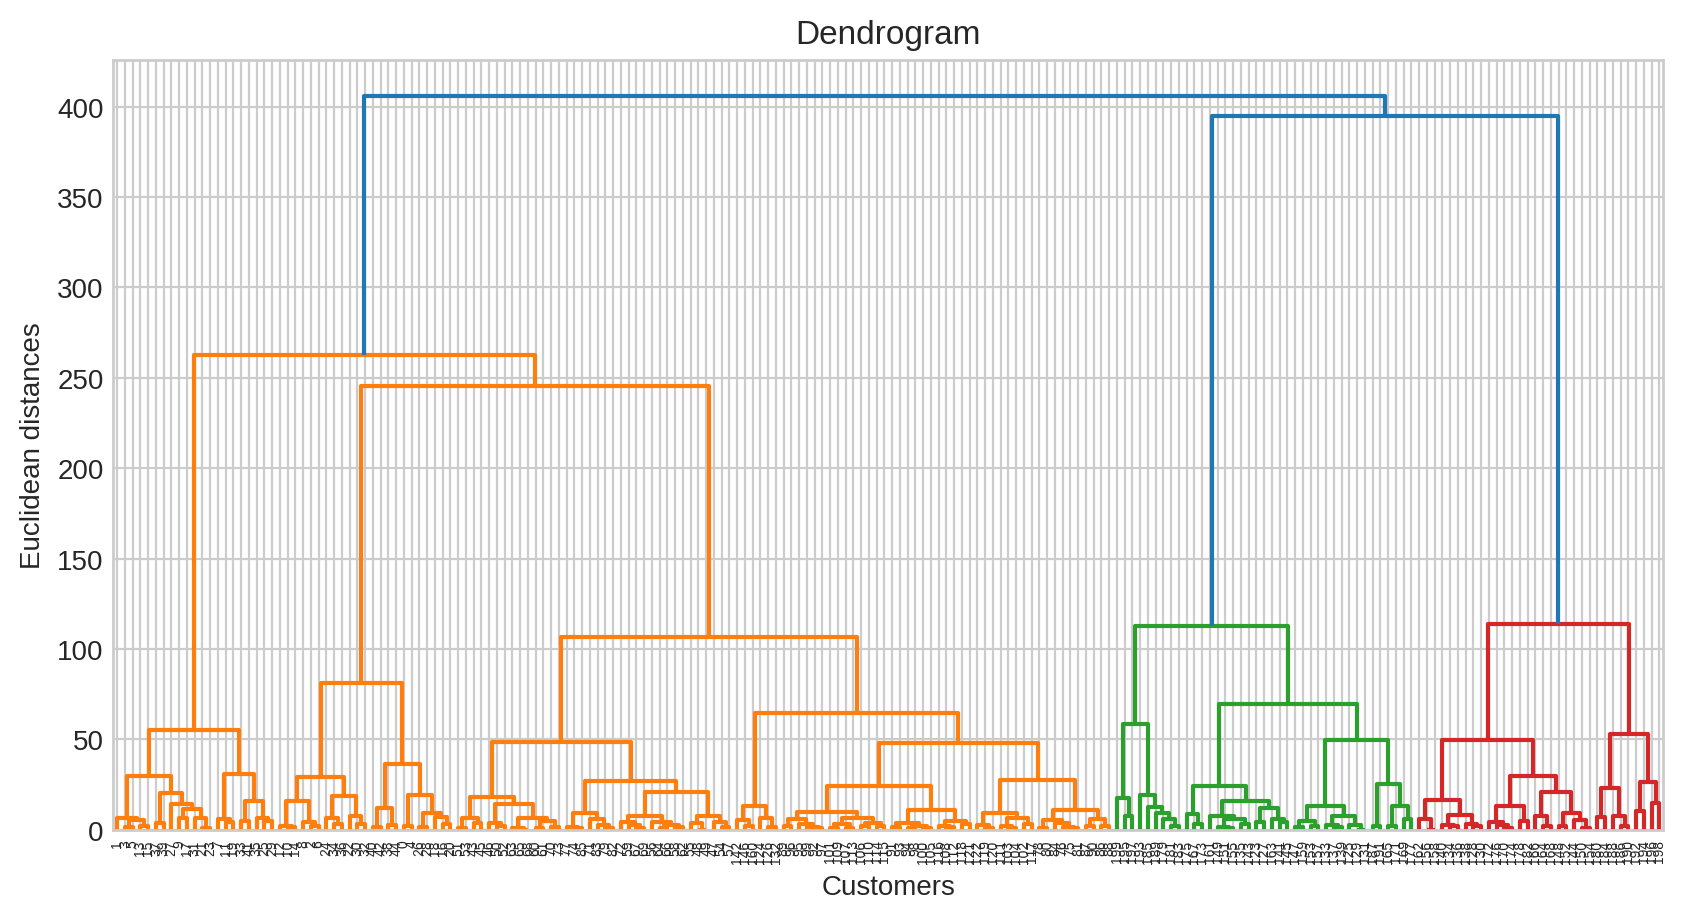

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
dendro = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


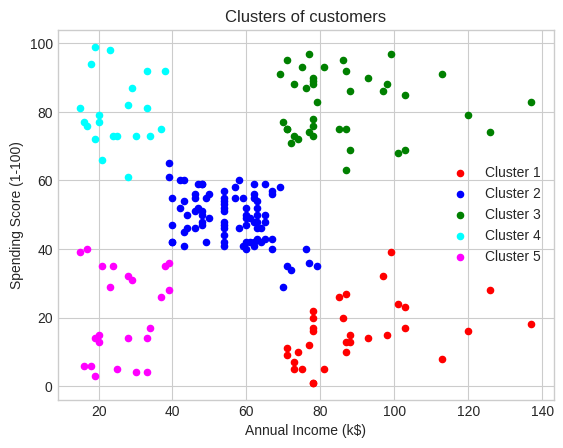

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = "green", label = "Cluster 3")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 20, c = "cyan", label = "Cluster 4")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 20, c = "magenta", label = "Cluster 5")

plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

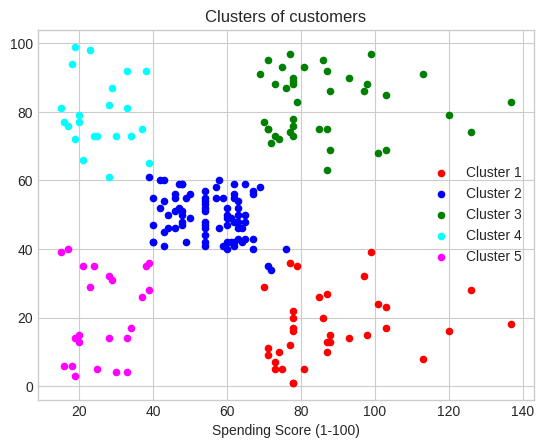

In [ ]:
kmeans = KMeans(n_clusters=5)

y_h_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_h_kmeans == 0, 0], X[y_h_kmeans == 0, 1], s = 20, c = "red", label = "Cluster 1")
plt.scatter(X[y_h_kmeans == 1, 0], X[y_h_kmeans == 1, 1], s = 20, c = "blue", label = "Cluster 2")
plt.scatter(X[y_h_kmeans == 2, 0], X[y_h_kmeans == 2, 1], s = 20, c = "green", label = "Cluster 3")
plt.scatter(X[y_h_kmeans == 3, 0], X[y_h_kmeans == 3, 1], s = 20, c = "cyan", label = "Cluster 4")
plt.scatter(X[y_h_kmeans == 4, 0], X[y_h_kmeans == 4, 1], s = 20, c = "magenta", label = "Cluster 5")
plt.title("Clusters of customers")
plt.xlabel("Spending Score (1-100)")
plt.legend()
plt.show()

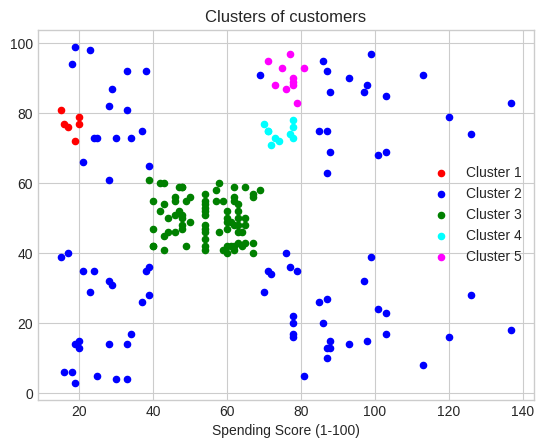

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=5)

dbscan = dbscan.fit_predict(X)

plt.scatter(X[dbscan == 0, 0], X[dbscan == 0, 1], s = 20, c = "red", label = "Cluster 1")
plt.scatter(X[dbscan == -1, 0], X[dbscan == -1, 1], s = 20, c = "blue", label = "Cluster 2")
plt.scatter(X[dbscan == 1, 0], X[dbscan == 1, 1], s = 20, c = "green", label = "Cluster 3")
plt.scatter(X[dbscan == 2, 0], X[dbscan == 2, 1], s = 20, c = "cyan", label = "Cluster 4")
plt.scatter(X[dbscan == 4, 0], X[dbscan == 4, 1], s = 20, c = "magenta", label = "Cluster 5")
plt.title("Clusters of customers")
plt.xlabel("Spending Score (1-100)")
plt.legend()
plt.show()

# K-means, DBSCAN, Agglomerative clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import matplotlib
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
import sklearn.cluster as cluster

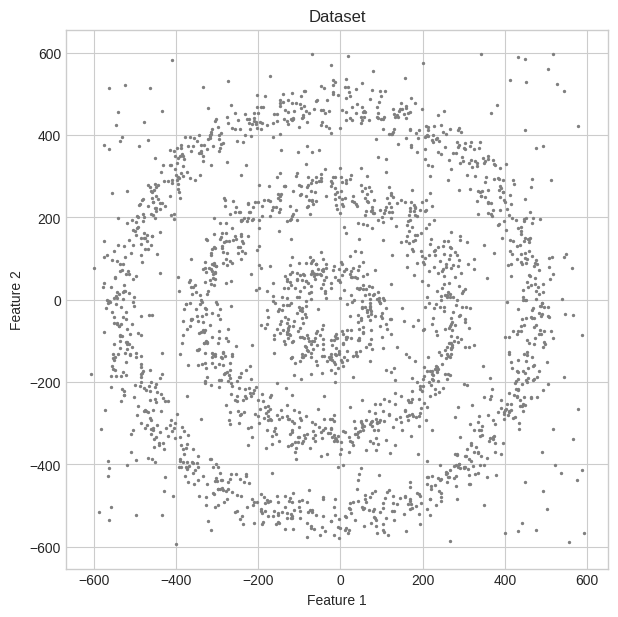

In [ ]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
  return [(math.cos(2*math.pi / n*x) * r + np.random.normal(-30,30),
          math.sin(2*math.pi / n*x) * r + np.random.normal(-30,30)) for x in range(1,n+1)]

# Create datapoints in form of a circle
df = pd.DataFrame(PointsInCircum(500, 1000))
df = df.append(PointsInCircum(300, 700))
df = df.append(PointsInCircum(100, 300))

# Add noise to the dataset
df = df.append([(np.random.randint(-600,600), np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(7, 7))
plt.scatter(df[0], df[1], s=2, color="grey")
plt.title("Dataset",fontsize=12)
plt.xlabel("Feature 1", fontsize=10)
plt.ylabel("Feature 2", fontsize=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
k_means = cluster.KMeans(n_clusters=3, random_state=42)
k_means.fit(df[[0, 1]])

KMeans(n_clusters=3, random_state=42)

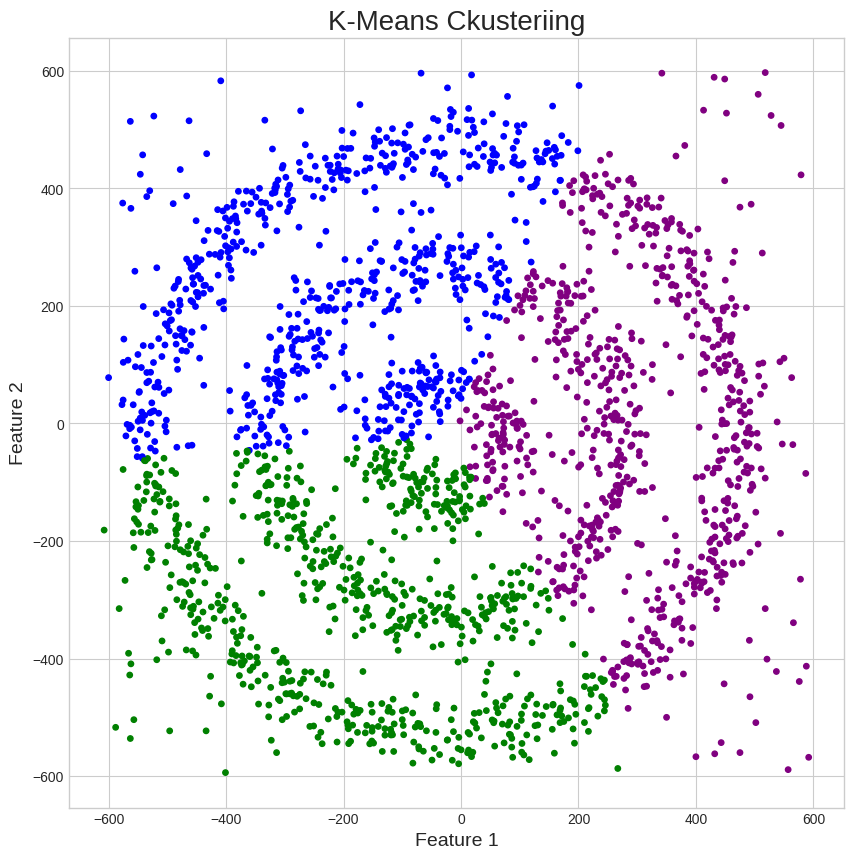

In [ ]:
df["KMeans_labels"] = k_means.labels_

# Plot the resulting clusters
colors = ["purple", "red", "blue", "green"]
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], c=df["KMeans_labels"], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title("K-Means Ckusteriing", fontsize=20)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
df

,0,1,KMeans_labels
0,405.472787,-6.580263,0
1,470.590314,-45.392094,0
2,433.102273,-22.291231,0
3,490.612686,-34.147860,0
4,448.629108,-0.275928,0
...,...,...,...
295,88.000000,-568.000000,2
296,557.000000,-589.000000,0
297,492.000000,-465.000000,0
298,18.000000,593.000000,1


In [ ]:
Agg = cluster.AgglomerativeClustering(n_clusters=3, affinity="euclidean")
Agg.fit(df[[0, 1]])

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

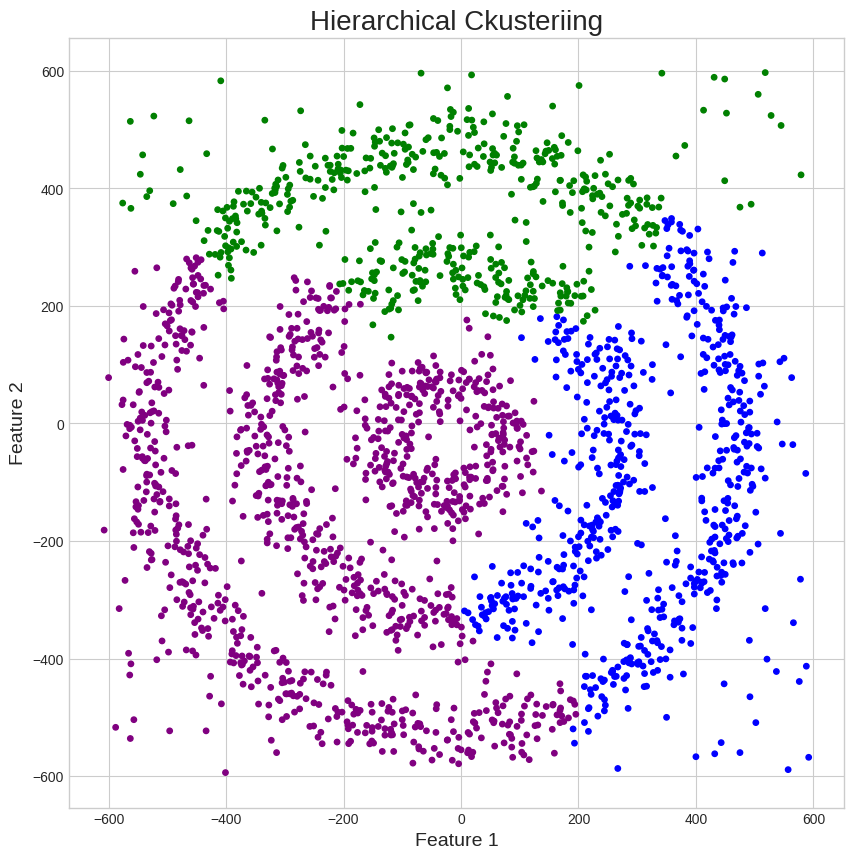

In [ ]:
df["HR_labels"] = Agg.labels_

# Plot the resulting clusters
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], c=df["HR_labels"], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title("Hierarchical Ckusteriing", fontsize=20)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
dbscan = cluster.DBSCAN()
dbscan.fit(df[[0, 1]])

DBSCAN()

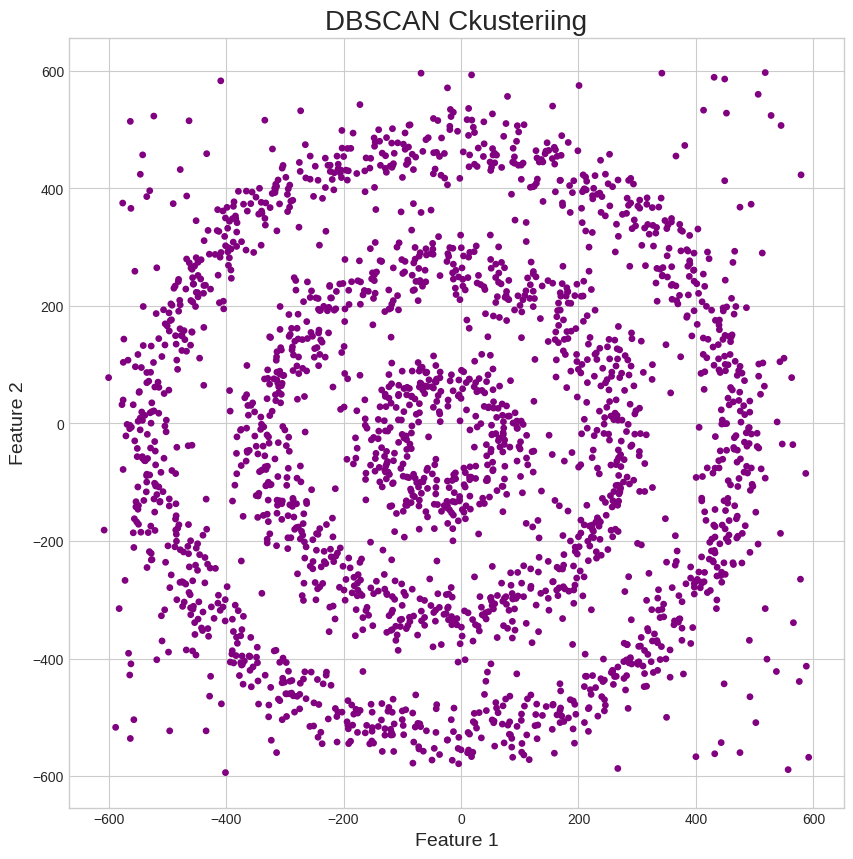

In [ ]:
df["DBSCAN_labels"] = dbscan.labels_

# Plot the resulting clusters
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], c=df["DBSCAN_labels"], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title("DBSCAN Ckusteriing", fontsize=20)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0, 1]])
distances, indices = nbrs.kneighbors(df[[0, 1]])

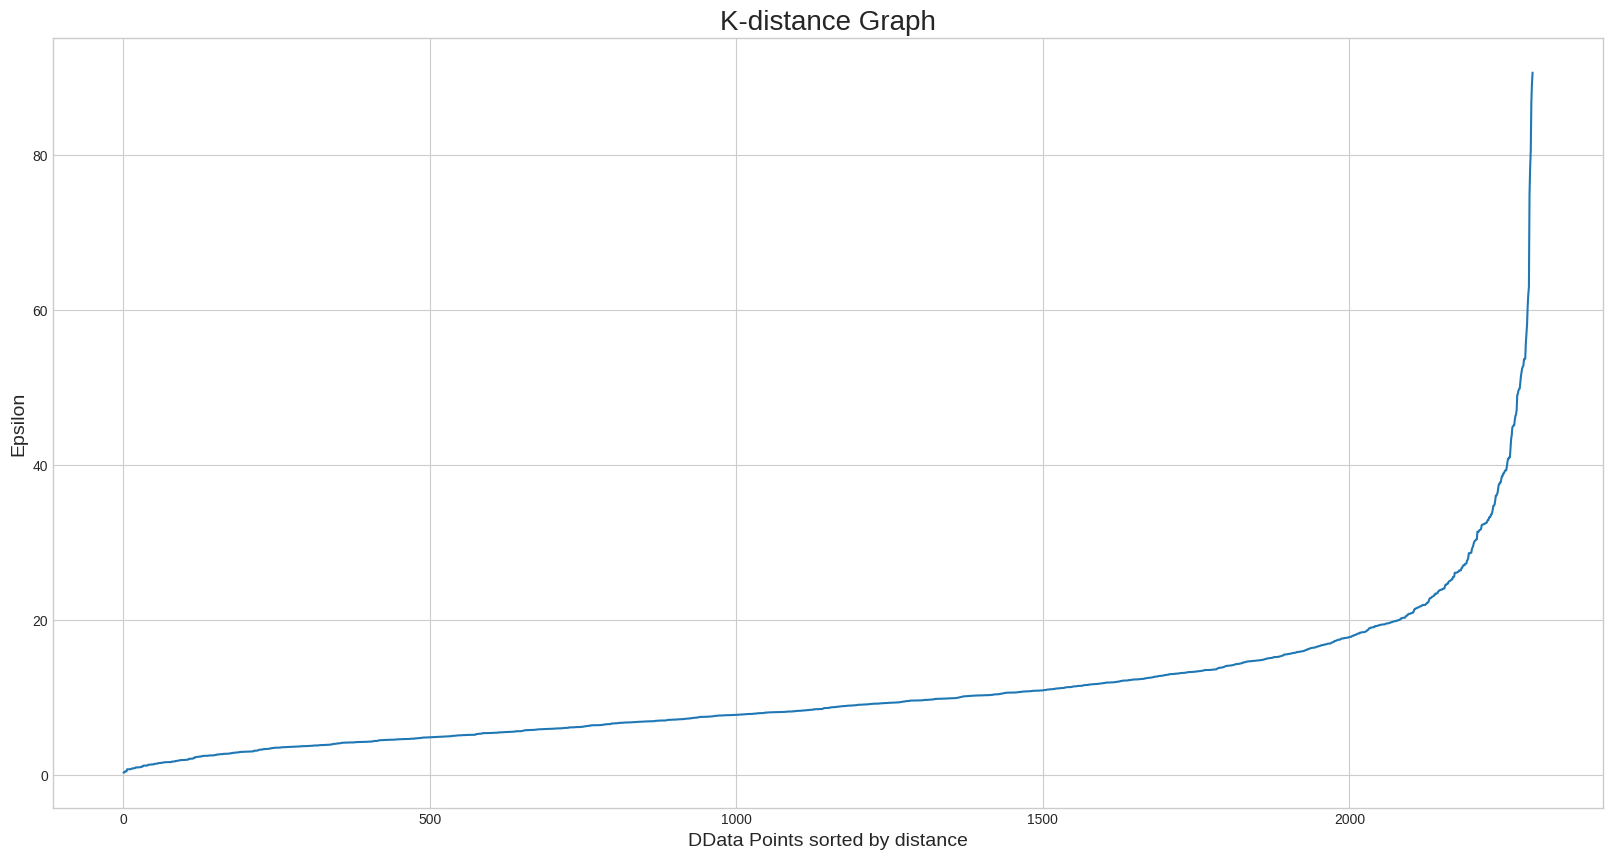

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(20, 10))
plt.plot(distances)
plt.title("K-distance Graph", fontsize=20)
plt.xlabel("DData Points sorted by distance", fontsize=14)
plt.ylabel("Epsilon", fontsize=14)
plt.show()

In [ ]:
dbscan_opt = cluster.DBSCAN(eps=35, min_samples=10)
dbscan_opt.fit(df[[0, 1]])

DBSCAN(eps=35, min_samples=10)

In [ ]:
df["DBSCAN_opt_labels"] = dbscan_opt.labels_
df["DBSCAN_opt_labels"].value_counts()

 4    726
 5    316
 0    291
 1    284
 2    232
 3    226
-1    225
Name: DBSCAN_opt_labels, dtype: int64

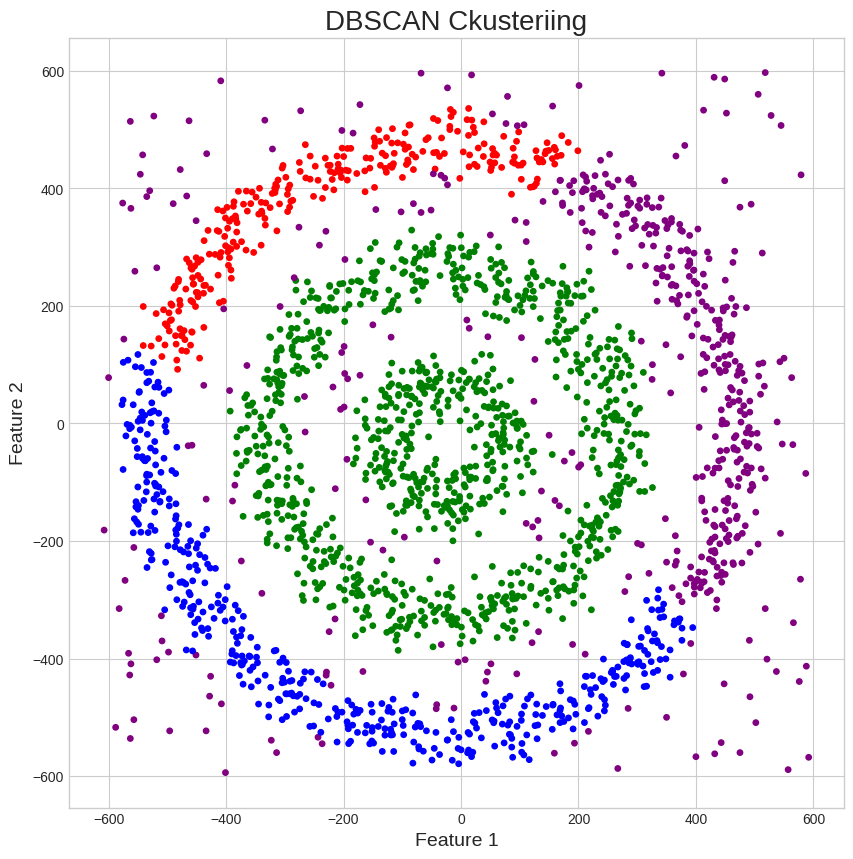

In [ ]:
# Plot the resulting clusters
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], c=df["DBSCAN_opt_labels"], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title("DBSCAN Ckusteriing", fontsize=20)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039167 sha256=f274ebc8006cf00c94853d5e98f5d1d4c5fcb1c263ffdf187e85cf7f2c7a790e
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
import hdbscan
dbscan_opt1 = hdbscan.HDBSCAN(min_samples=6)
dbscan_opt1.fit(df[[0, 1]])

HDBSCAN(min_samples=6)

In [ ]:
df["DBSCAN_opt_labels1"] = dbscan_opt1.labels_
df["DBSCAN_opt_labels1"].value_counts()

 0    1075
 2     726
 1     313
-1     186
Name: DBSCAN_opt_labels1, dtype: int64

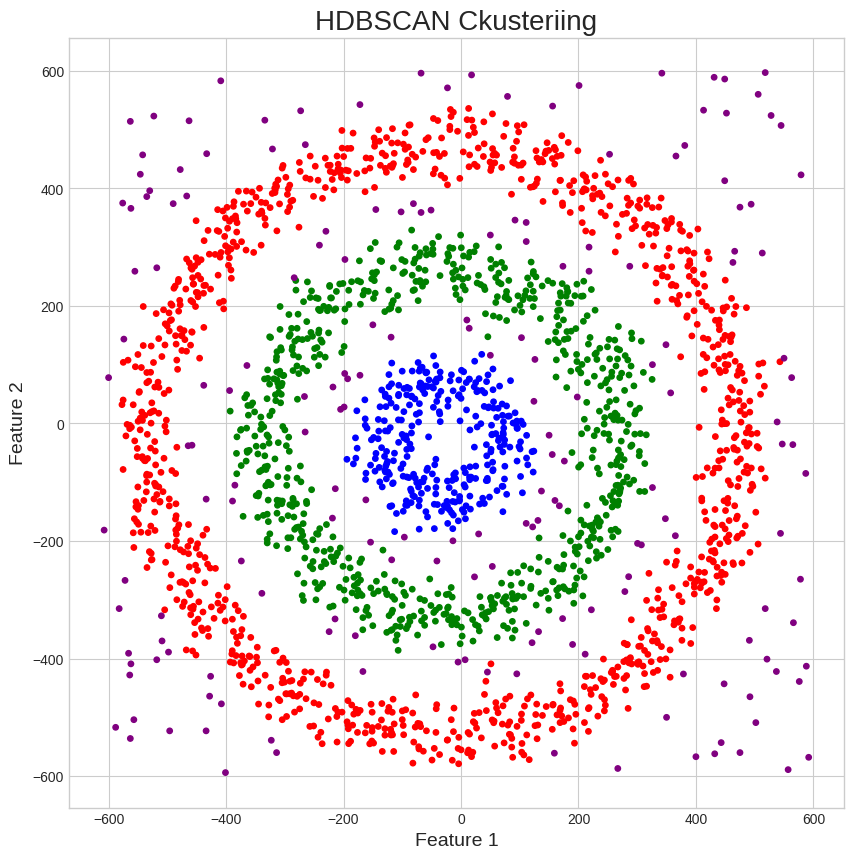

In [ ]:
# Plot the resulting clusters
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], c=df["DBSCAN_opt_labels1"], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title("HDBSCAN Ckusteriing", fontsize=20)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# K-Means

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

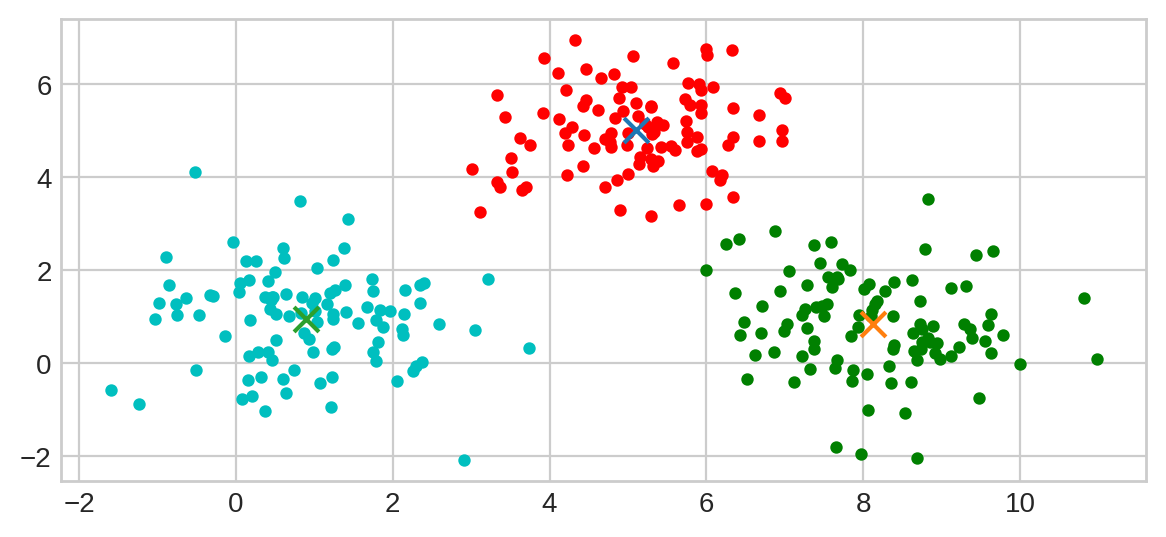

In [ ]:
#from scratch
class K_Means:
    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance

    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]


        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []

            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)



            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break



def main():
    K=3
    center_1 = np.array([1,1])
    center_2 = np.array([5,5])
    center_3 = np.array([8,1])

    # Generate random data and center it to the three centers
    cluster_1 = np.random.randn(100, 2) + center_1
    cluster_2 = np.random.randn(100, 2) + center_2
    cluster_3 = np.random.randn(100, 2) + center_3

    data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

    k_means = K_Means(K)
    k_means.fit(data)


    # Plotting starts here
    plt.figure(figsize=(7, 3), dpi=200)
    colors = 10*["r", "g", "c", "b", "k"]


    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color, s = 12)

    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 80, marker = "x")


if __name__ == "__main__":
    main()

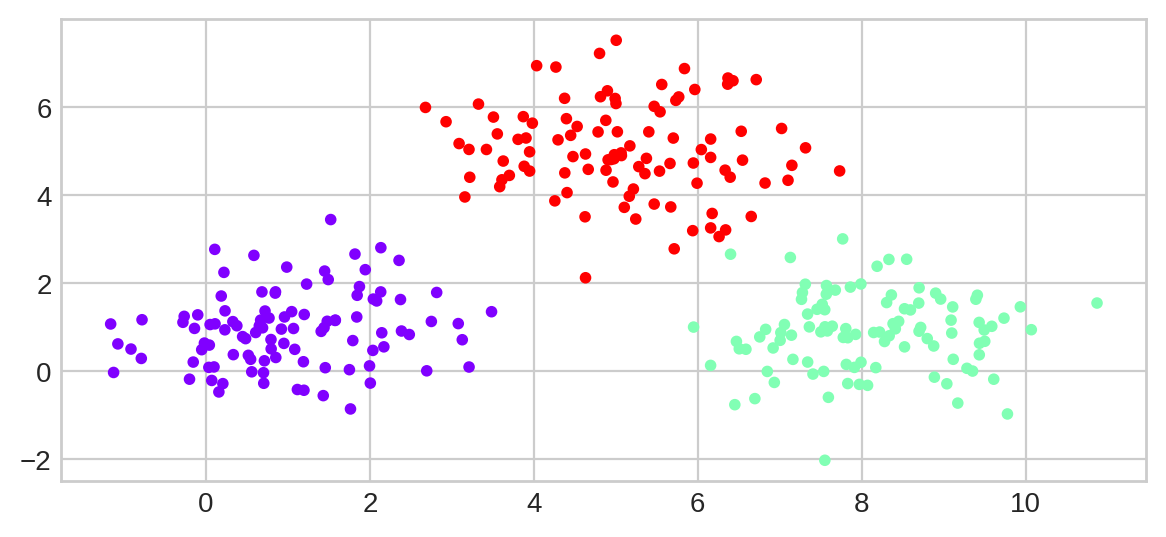

In [ ]:
from sklearn.cluster import KMeans
# Generate the same data
center_1 = np.array([1, 1])
center_2 = np.array([5, 5])
center_3 = np.array([8, 1])
# Generate random data and center it to the three centers
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100, 2) + center_2
cluster_3 = np.random.randn(100, 2) + center_3
data = np.concatenate((cluster_1, cluster_2, cluster_3), axis=0)

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Plotting
plt.figure(figsize=(7,3), dpi=200)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap="rainbow", s=10)
plt.show()

<Axes: >

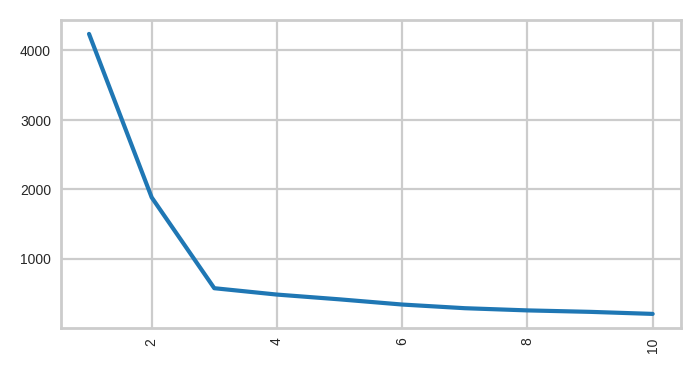

In [ ]:
wcss = []

for i in range(10):
  clustering = KMeans(n_clusters=i+1, init="k-means++", random_state=42)
  clustering.fit(data)
  wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(4,2), dpi=200)
plt.xticks(size=5, rotation=90)
plt.yticks(size=5)
sns.lineplot(x=ks, y=wcss)

## Applications

(10, 64)
(1797, 3)


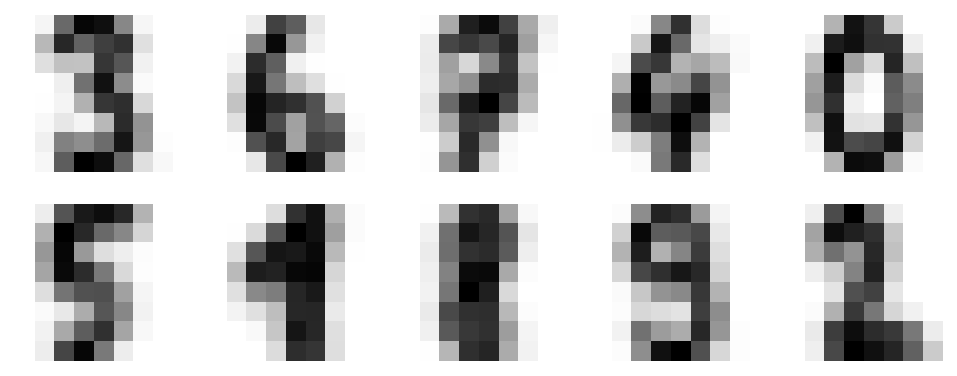

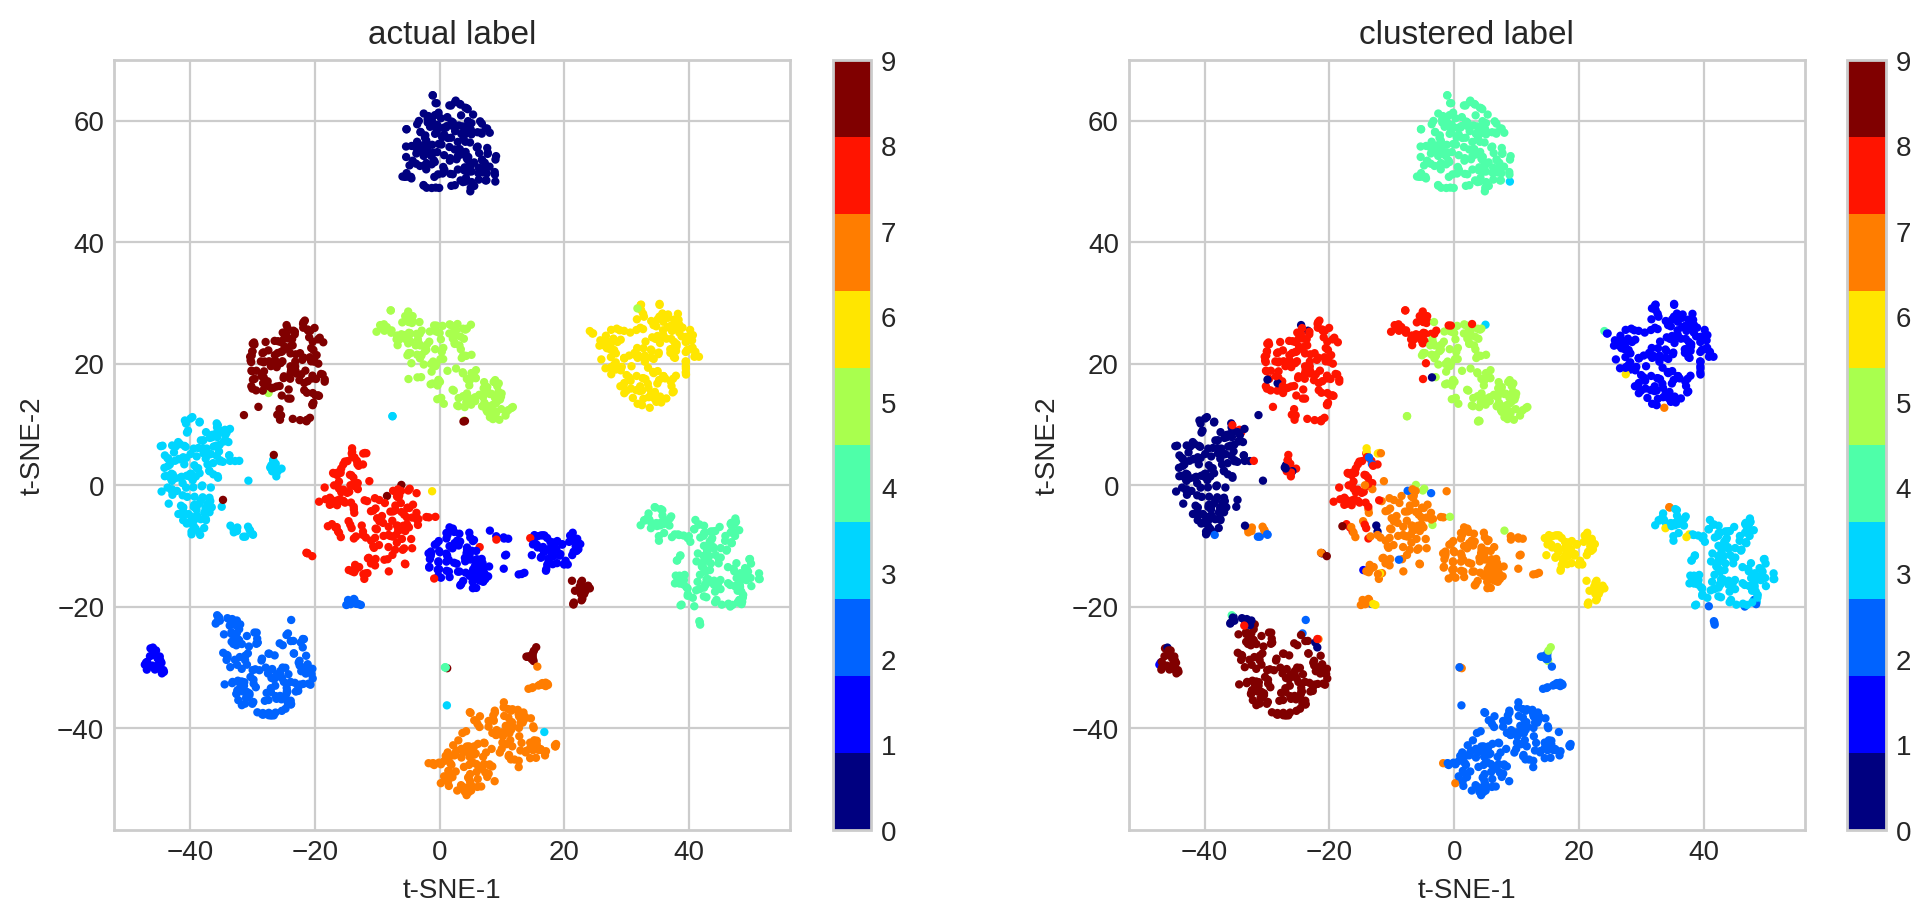

In [ ]:
# Load digits dataset
from sklearn.datasets import  load_digits
digits = load_digits()

# cluster digits to 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)

cluster_ids = kmeans.predict(digits.data)

# Check the output shape
print(kmeans.cluster_centers_.shape)

# Visualize cluster centers
fig = plt.figure(figsize=(8,3), dpi=150)
for i in range(10):
  ax = fig.add_subplot(2, 5, 1+i)
  ax.imshow(kmeans.cluster_centers_[i].reshape(8,8), cmap=plt.cm.binary)
  ax.grid(False)
  ax.axis("off")

# visualize the projected data
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12,5), dpi=200)
c_map = plt.cm.get_cmap("jet", 10)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(digits.data);
tsne_data = np.vstack((tsne_data.T, digits.target)).T
print(tsne_data.shape)

plt.subplot(1, 2, 1)
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=4, cmap=c_map, c=digits.target)
plt.colorbar()
plt.xlabel("t-SNE-1"), plt.ylabel("t-SNE-2")
plt.title("actual label")

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=4, cmap=c_map, c=cluster_ids)
plt.colorbar()
plt.xlabel("t-SNE-1"), plt.ylabel("t-SNE-2")
plt.title("clustered label")
plt.show()